In [1]:
from feature_selector import FeatureSelector
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

## Loading data 

In [2]:
# Features

train_x = pd.read_csv('train_x.csv')
test_x = pd.read_csv('test_x.csv')

# Lables

train_y = pd.read_csv('train_y.csv')
test_y = pd.read_csv('test_y.csv')


## Train simple RF model

In [3]:
model = RandomForestClassifier(n_estimators = 100,
                               oob_score = True,
                               random_state = 1)

In [4]:
model.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [5]:
pred = model.predict(test_x)

In [6]:
print ("AUC-ROC (test) = ", roc_auc_score(test_y, pred))

AUC-ROC (test) =  0.628145508665705


## Create and use FeatureSelector

In [7]:
feature_selector = FeatureSelector(model, train_x, test_x, train_y, test_y, train_x.columns)

Initiating FeatureSelector...
Done.
Creating interpretator for model
Done.
Building SHAP explainer for Tree Model
Done.
Computing SHAP values for first 100 test samples...
Done.


### Feature importance example

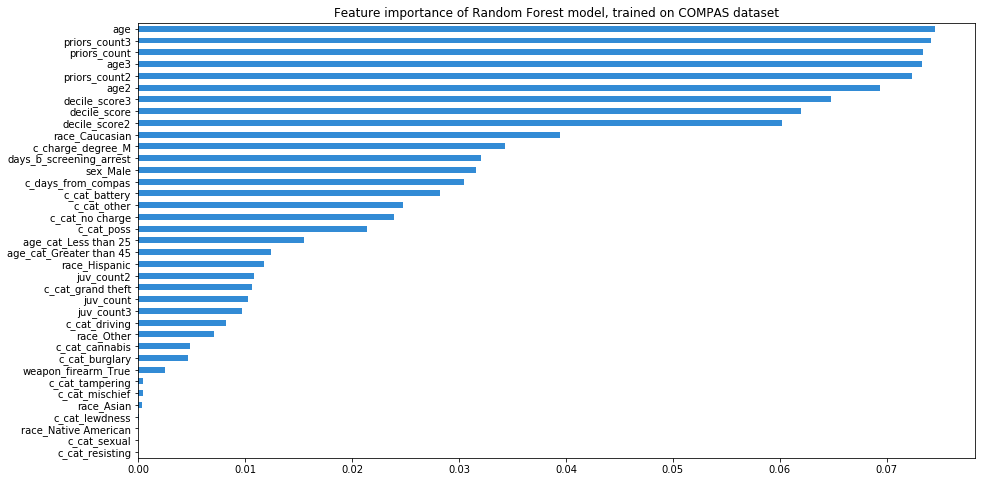

In [8]:
feature_selector.featureImportance()

### Partial dependence examples

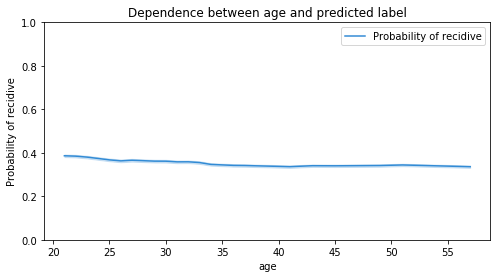

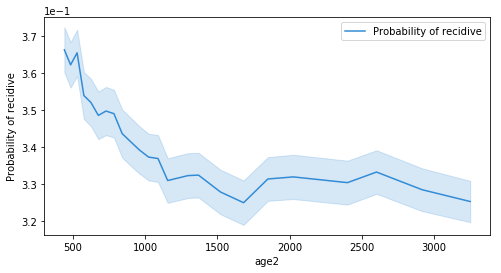

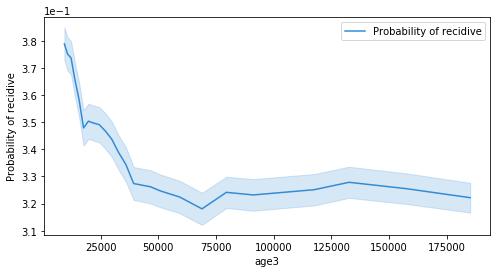

In [9]:
feature_selector.partialDependence(['age', 'age2', 'age3'])

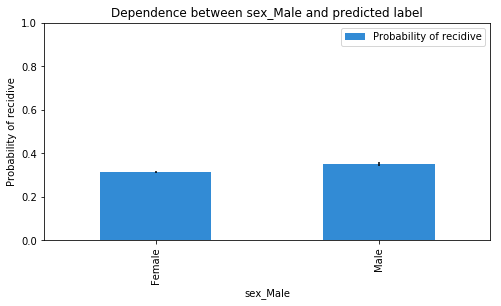

In [10]:
feature_selector.partialDependence(['sex_Male'], tick_labels_list = ['Female', 'Male'])

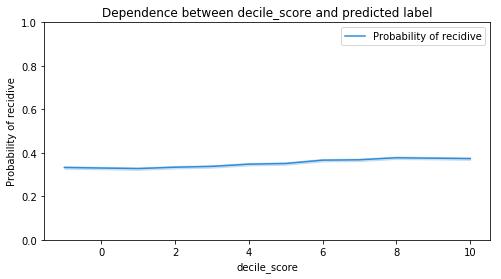

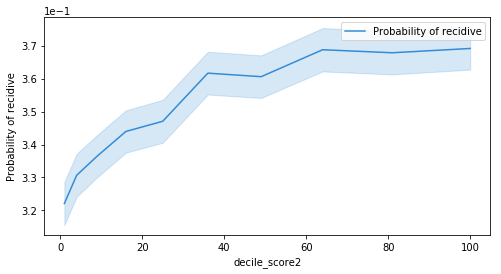

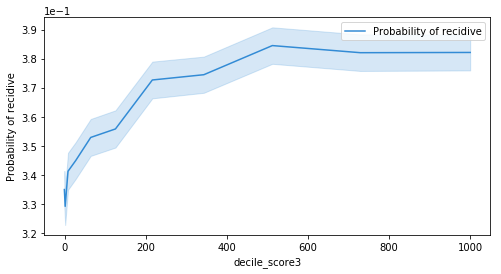

In [11]:
feature_selector.partialDependence(['decile_score', 'decile_score2', 'decile_score3'])

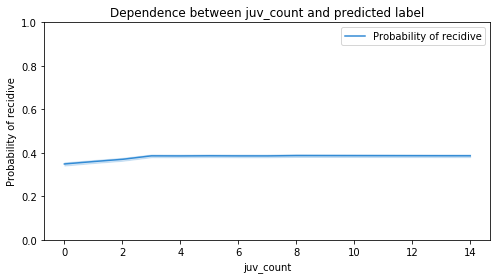

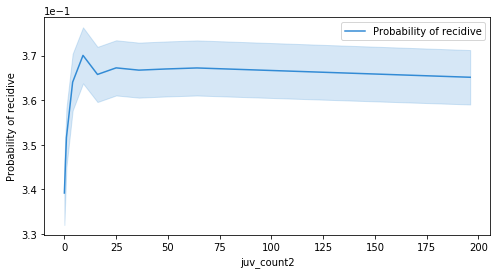

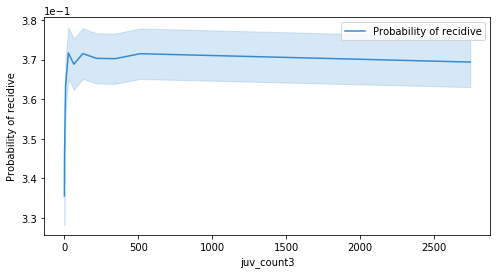

In [12]:
feature_selector.partialDependence(['juv_count', 'juv_count2', 'juv_count3'])

### Example of calculating SHAP values and plotting

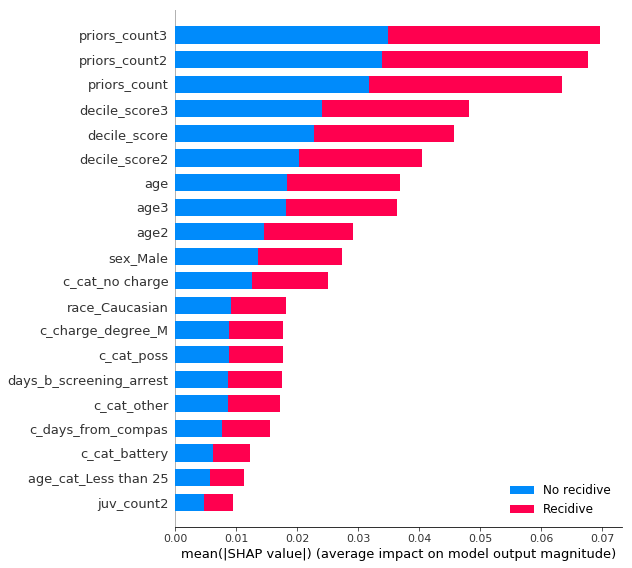

In [13]:
feature_selector.shapSummaryPlot()